C:\Users\Appa Rao\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


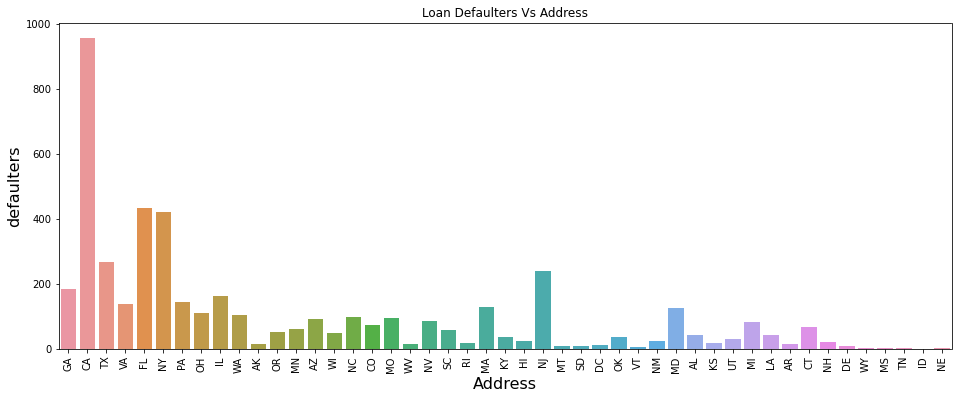

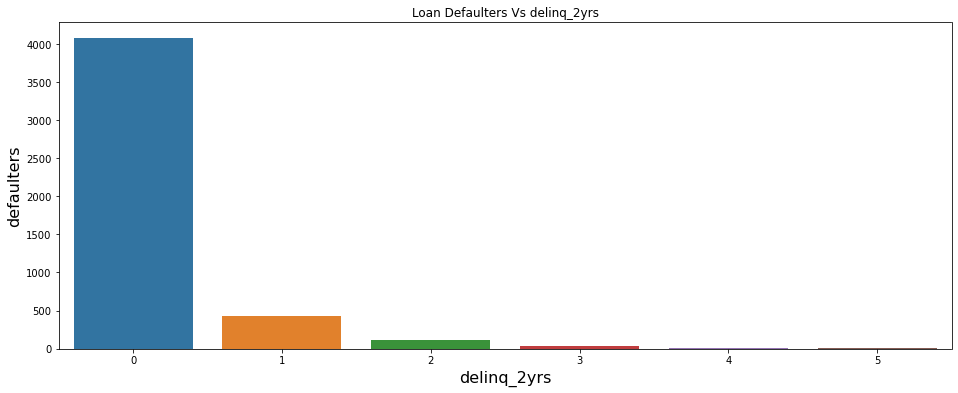

C:\Users\Appa Rao\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: Could not interpret value `earliest_cr_line` for parameter `x`

<Figure size 1152x432 with 0 Axes>

In [324]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# We are reading the Loan.csv file using Panda Library 

inp0 = pd.read_csv("loan.csv")

#just checking the fromat of the data

inp0.head()
inp0.shape

# As most of the columns are have same data throughout so we have removed those columns first

inp0 = inp0.iloc[ : , :49]
inp0.head()

# How many null values are there in the table are checked and one by one is taken to remove the missing values

inp0.isnull().sum()

# The missing values for null values are dropped

inp0.emp_length.value_counts()
##inp0["emp_length"] = inp0["emp_length"].fillna('Not Available') 
inp0=inp0[~(inp0['emp_length'].isnull())]
inp0.emp_length.value_counts()

inp0.emp_length.value_counts()
inp0=inp0[~(inp0['revol_util'].isnull())]
inp0.revol_util.value_counts()

inp0.emp_length.value_counts()
inp0=inp0[~(inp0['last_credit_pull_d'].isnull())]
inp0.last_credit_pull_d.value_counts()

# any one of the below columns is enough for analysis so we can remove title column

inp0.title.value_counts()
inp0.purpose.value_counts()

# Dropping some more columns which are not used for Data Analysis

inp0.drop(["member_id",'id','pymnt_plan',"url","desc","earliest_cr_line","initial_list_status","last_pymnt_d","title"], axis = 1, inplace = True)

inp0.drop(["next_pymnt_d","emp_title","issue_d"], axis = 1, inplace = True)


#Data Cleaning 


# Removing last XX value in Zip code

inp0['zip_code']=inp0['zip_code'].replace(regex=['xx'], value='')
inp0.zip_code.isnull().sum()
inp0.zip_code = inp0.zip_code.astype("int32")
inp0.shape
##inp0.info()


# Remove the months in term column

def term_months(val):
    return int(val.replace("months",""))
inp0.term = inp0.term.apply(term_months)
inp0.term.value_counts()

# Remove % symbol from int rate column

def intrate(val):
    return float(val.replace("%",""))
inp0.int_rate = inp0.int_rate.apply(intrate)
inp0.revol_util = inp0.revol_util.apply(intrate)
inp0.int_rate.value_counts()

#Remove years , "+" ,'<' in emp_length column

inp0["emp_length"] = pd.to_numeric(inp0["emp_length"].apply(lambda y:0 if "<" in y else (y.split('+')[0] if "+" in y else y.split()[0])))

inp0.loan_status.value_counts()

# Remove Loan status = Current 
inp0= inp0[~(inp0.loan_status == 'Current')]
inp0.loan_status.value_counts()
#inp0.info()

#  Outliners

# As some values in Annula income are very high so we have removed them 

plt.boxplot(inp0.funded_amnt)
inp0.annual_inc.describe()
inp0 = inp0[inp0.annual_inc < 850000]
plt.boxplot(inp0.annual_inc)
inp0 = inp0[inp0.total_acc < 50]
plt.boxplot(inp0.total_acc)
plt.show()
inp0.total_acc.describe()
inp0 = inp0[inp0.open_acc < 18]
plt.boxplot(inp0.open_acc)
plt.show()
inp0.open_acc.describe()
inp0 = inp0[inp0.pub_rec < 0.5]
plt.boxplot(inp0.pub_rec)
plt.show()
inp0.pub_rec.describe()


# ANALYSIS ON THE FILTERED DATA 

#UNIVARIATE ANALYSIS

# create Plot for Defaulters
sns.countplot(x="loan_status", data=inp0)
plt.title("Loan STATUS")
plt.show()
inp0 = inp0[inp0.loan_status == 'Charged Off']

# Create Plot Laon Defaulters Vs Term
sns.countplot(x='term', data=inp0)
plt.title("Loan Defaulters Vs TERM")
plt.xlabel("Term", fontsize=16)
plt.ylabel("defaulters", fontsize=16)
plt.show(

# Create Plot Loan Defaulters Vs Grade

sns.countplot(x='grade', data=inp0)
plt.title("Loan Defaulters Vs Grade")
plt.xlabel("Grade", fontsize=16)
plt.ylabel("defaulters", fontsize=16)
plt.show()

# Create Plot Loan Defaulters Vs SUB-Grade

sns.countplot(x='sub_grade', data=inp0)
plt.title("Loan Defaulters Vs Sub-Grade")
plt.xticks(rotation=90)
plt.xlabel("Sub-Grade", fontsize=16)
plt.ylabel("defaulters", fontsize=16)
plt.show()

# Create Plot Loan Defaulters Vs Experience

sns.countplot(x='emp_length', data=inp0)
plt.title("Loan Defaulters Vs Experience")
plt.xlabel("Experience", fontsize=16)
plt.ylabel("defaulters", fontsize=16)
plt.show()

# Create Plot Loan Defaulters Vs Ownership

sns.countplot(x='home_ownership', data=inp0)
plt.title("Loan Defaulters Vs home_ownership")
plt.xlabel("home_ownership", fontsize=16)
plt.ylabel("defaulters", fontsize=16)
plt.show()

# Create Plot Loan Defaulters Vs total_acc

plt.figure(figsize=(16,6))
sns.countplot(x='total_acc', data=inp0)
plt.title("Loan Defaulters Vs Total Account")
plt.xlabel("Total Account", fontsize=16)
plt.ylabel("defaulters", fontsize=16)
plt.show()

# Create Plot Loan Defaulters Vs total_acc

sns.countplot(x='verification_status', data=inp0)
plt.title("Loan Defaulters Vs verification_status")
plt.xlabel("verification_status", fontsize=16)
plt.ylabel("defaulters", fontsize=16)
plt.show()

# Create Plot Loan Defaulters Vs Purpose

sns.countplot(x='purpose', data=inp0)
plt.title("Loan Defaulters Vs Purpose")
plt.xticks(rotation=90)
plt.xlabel("Purpose", fontsize=16)
plt.ylabel("defaulters", fontsize=16)
plt.show()

# Create Plot Loan Defaulters Vs Address

plt.figure(figsize=(16,6))
sns.countplot(x='addr_state', data=inp0)
plt.title("Loan Defaulters Vs Address")
plt.xticks(rotation=90)
plt.xlabel("Address", fontsize=16)
plt.ylabel("defaulters", fontsize=16)
plt.show()


# Create Plot Loan Defaulters Vs delinq_2yrs

plt.figure(figsize=(16,6))
sns.countplot(x='delinq_2yrs', data=inp0)
plt.title("Loan Defaulters Vs delinq_2yrs")
plt.xlabel("delinq_2yrs", fontsize=16)
plt.ylabel("defaulters", fontsize=16)
plt.show()

# Create Plot "int_rate", "annual_inc"

plt.figure(figsize=(16,6))
sns.scatterplot("earliest_cr_line", "int_rate")
plt.title("Scatter plot between loanamnt, intrate")
plt.xlabel(x, fontsize=16)
plt.ylabel(y, fontsize=16)
plt.show()
